# TASK: TIME SERIES BREAKDOWN OF RETAIL SALES

## Step 1: Data Preprocesssing

In [2]:
import pandas as pd

In [4]:
walmart_df=pd.read_csv("features.csv",encoding='ISO-8859-1')

In [8]:
walmart_df.head(30)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [25]:
# First, I’ll make sure the Date column is actually a datetime object so time-based analysis works properly
walmart_df["Date"] = pd.to_datetime(walmart_df["Date"])

# Now I’ll sort the data by Store and Date so everything is in a logical order
walmart_df = walmart_df.sort_values(["Store", "Date"]).reset_index(drop=True)

# The dataset has multiple MarkDown columns, so I’ll collect their names in one list for easy handling
markdown_cols = [c for c in walmart_df.columns if "MarkDown" in c]

# Many MarkDown values are missing — I’ll replace NaN with 0 because “no markdown” makes sense
walmart_df[markdown_cols] = walmart_df[markdown_cols].fillna(0)

# Some important numeric columns (Temperature, Fuel Price, CPI, Unemployment) have gaps
# I’ll fill them using forward-fill and backward-fill within each Store to avoid breaking time continuity
num_cols = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]
walmart_df[num_cols] = walmart_df.groupby("Store")[num_cols].ffill().bfill()

# Let’s also fix the data types:
# - IsHoliday should be boolean (True/False) not integers
# - Store should be treated as a category, not a number
walmart_df["IsHoliday"] = walmart_df["IsHoliday"].astype(bool)
walmart_df["Store"] = walmart_df["Store"].astype("category")

# To make time analysis easier, I’ll add Year, Month, and a combined YearMonth column
walmart_df["Year"] = walmart_df["Date"].dt.year
walmart_df["Month"] = walmart_df["Date"].dt.month
walmart_df["YearMonth"] = walmart_df["Date"].dt.to_period("M").astype(str)

# Finally, I’ll create a TotalMarkDown column by summing all the markdown-related features
# This gives one single number for total discount activity per row
walmart_df["TotalMarkDown"] = walmart_df[markdown_cols].sum(axis=1)


C:\Users\kk\AppData\Local\Temp\ipykernel_9296\1010721001.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  walmart_df[num_cols] = walmart_df.groupby("Store")[num_cols].ffill().bfill()


In [26]:
walmart_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,YearMonth,TotalMarkDown,MonthName
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,2010-02,0.0,Feb
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,2010,2,2010-02,0.0,Feb
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,2010,2,2010-02,0.0,Feb
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,2010,2,2010-02,0.0,Feb
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,2010,3,2010-03,0.0,Mar


## Step 2: Trend Analysis and Moving Averages

C:\Users\kk\AppData\Local\Temp\ipykernel_9296\1016095170.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_trends.index = pd.to_datetime(monthly_trends.index)


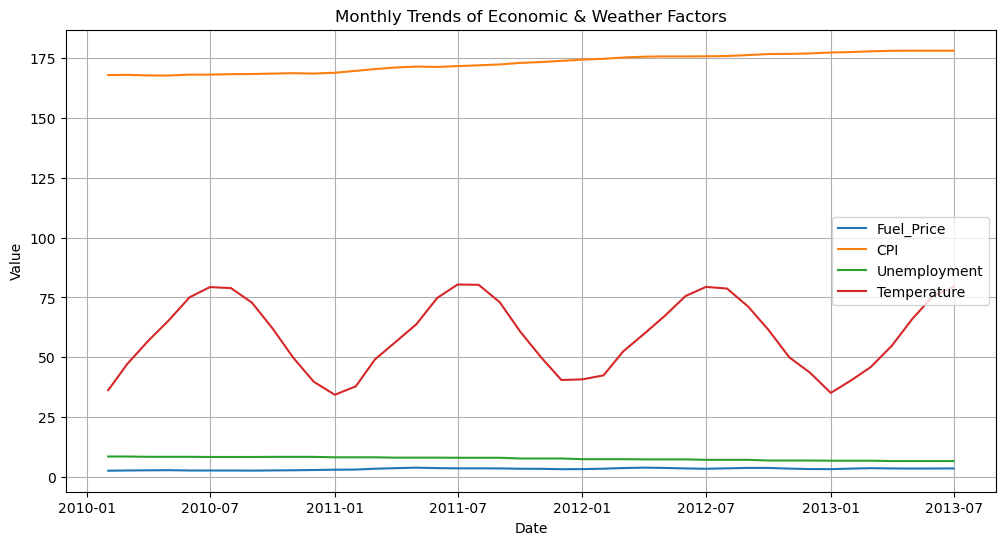

In [27]:
import matplotlib.pyplot as plt

# I’ll group the data by YearMonth and take the average of important numeric features
# This way we can see how Fuel Price, CPI, Unemployment, and Temperature change month by month
monthly_trends = walmart_df.groupby("YearMonth")[["Fuel_Price", "CPI", "Unemployment", "Temperature"]].mean()

# The YearMonth column is text right now, so I’ll convert it back to a proper datetime index for plotting
monthly_trends.index = pd.to_datetime(monthly_trends.index)

# Time to visualize! I’ll plot each of these features on the same chart to spot overall patterns
plt.figure(figsize=(12,6))
for col in monthly_trends.columns:
    plt.plot(monthly_trends.index, monthly_trends[col], label=col)

# Adding some finishing touches: title, labels, legend, and a light grid
plt.title("Monthly Trends of Economic & Weather Factors")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


## Step 3: Seasonal Patterns

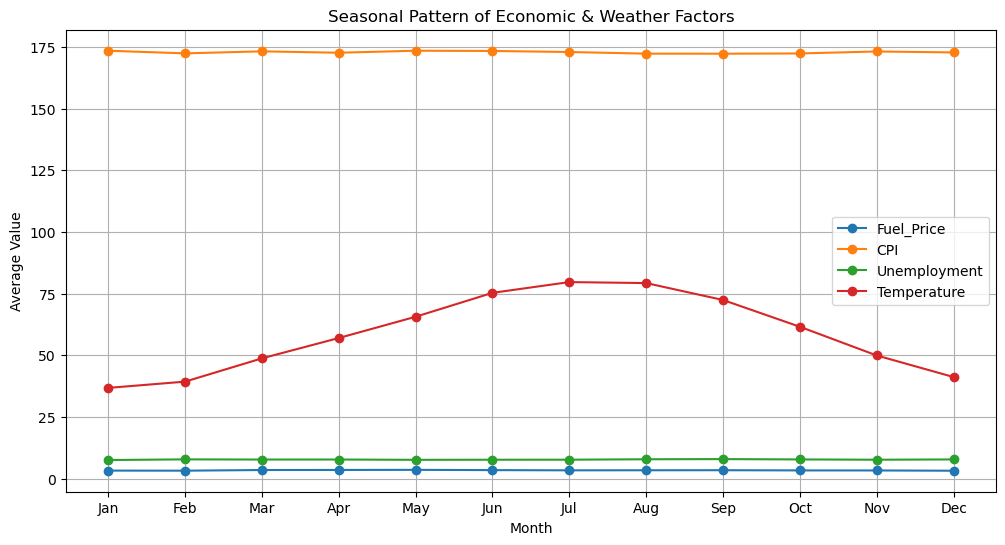

In [28]:
import matplotlib.pyplot as plt

# I’ll add a new column that stores the month name (Jan, Feb, etc.) for each record
walmart_df["MonthName"] = walmart_df["Date"].dt.strftime("%b")

# Now I’ll group the data by month name and calculate the average of key features across all years
# This helps us see typical seasonal behavior for each month
seasonal_trends = walmart_df.groupby("MonthName")[["Fuel_Price", "CPI", "Unemployment", "Temperature"]].mean()

# By default, groupby will sort alphabetically (Apr, Aug, Dec, …)
# So I’ll reindex to force the months into their natural calendar order (Jan → Dec)
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
seasonal_trends = seasonal_trends.reindex(month_order)

# Time to visualize! I’ll plot each variable’s monthly average to highlight seasonal patterns
plt.figure(figsize=(12,6))
for col in seasonal_trends.columns:
    plt.plot(seasonal_trends.index, seasonal_trends[col], marker="o", label=col)

# Adding title, axis labels, legend, and grid to make the chart more readable
plt.title("Seasonal Pattern of Economic & Weather Factors")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.legend()
plt.grid(True)
plt.show()



## Step 4: Moving Averages

In [20]:
# Let's quickly inspect column types so we know which columns are numeric vs categorical
print("Column dtypes:\n", walmart_df.dtypes)

# Let's make a list of numeric columns so we never try to average non-numeric data
numeric_cols = walmart_df.select_dtypes(include=['number']).columns.tolist()
print("\nNumeric columns detected:", numeric_cols)

Column dtypes:
 Store                  category
Date             datetime64[ns]
Temperature             float64
Fuel_Price              float64
MarkDown1               float64
MarkDown2               float64
MarkDown3               float64
MarkDown4               float64
MarkDown5               float64
CPI                     float64
Unemployment            float64
IsHoliday                  bool
Year                      int32
Month                     int32
YearMonth                object
TotalMarkDown           float64
MonthName                object
dtype: object

Numeric columns detected: ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'TotalMarkDown']


C:\Users\kk\AppData\Local\Temp\ipykernel_9296\2607125252.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  wm_monthly = walmart_df.set_index("Date").resample("M")[numeric_cols].mean()


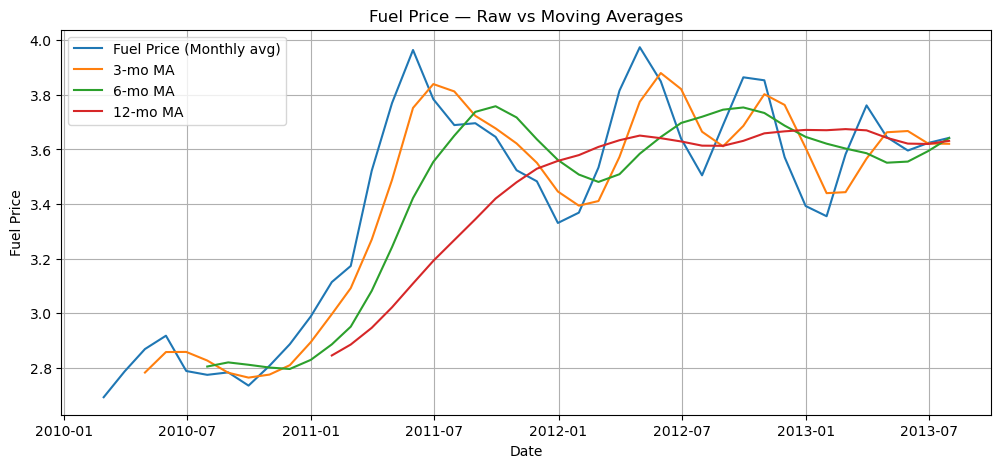

In [21]:
# I'll make a monthly dataframe that only includes numeric columns so mean() is safe
wm_monthly = walmart_df.set_index("Date").resample("M")[numeric_cols].mean()

# I'll compute a short-term 3-month moving average for fuel price to smooth noise
wm_monthly["Fuel_3MA"] = wm_monthly["Fuel_Price"].rolling(window=3).mean()

# I'll compute a medium-term 6-month moving average for fuel price as another view
wm_monthly["Fuel_6MA"] = wm_monthly["Fuel_Price"].rolling(window=6).mean()

# I'll compute a long-term 12-month moving average for fuel price to capture yearly trend
wm_monthly["Fuel_12MA"] = wm_monthly["Fuel_Price"].rolling(window=12).mean()

# Let's plot the fuel price and its moving averages so we can visually compare them
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(wm_monthly.index, wm_monthly["Fuel_Price"], label="Fuel Price (Monthly avg)")
plt.plot(wm_monthly.index, wm_monthly["Fuel_3MA"], label="3-mo MA")
plt.plot(wm_monthly.index, wm_monthly["Fuel_6MA"], label="6-mo MA")
plt.plot(wm_monthly.index, wm_monthly["Fuel_12MA"], label="12-mo MA")
plt.title("Fuel Price — Raw vs Moving Averages")
plt.xlabel("Date")
plt.ylabel("Fuel Price")
plt.legend()
plt.grid(True)
plt.show()



## Step 5: Time Series Decomposition

C:\Users\kk\AppData\Local\Temp\ipykernel_9296\3932494724.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp_monthly = wm_monthly["Temperature"].dropna().asfreq("M")


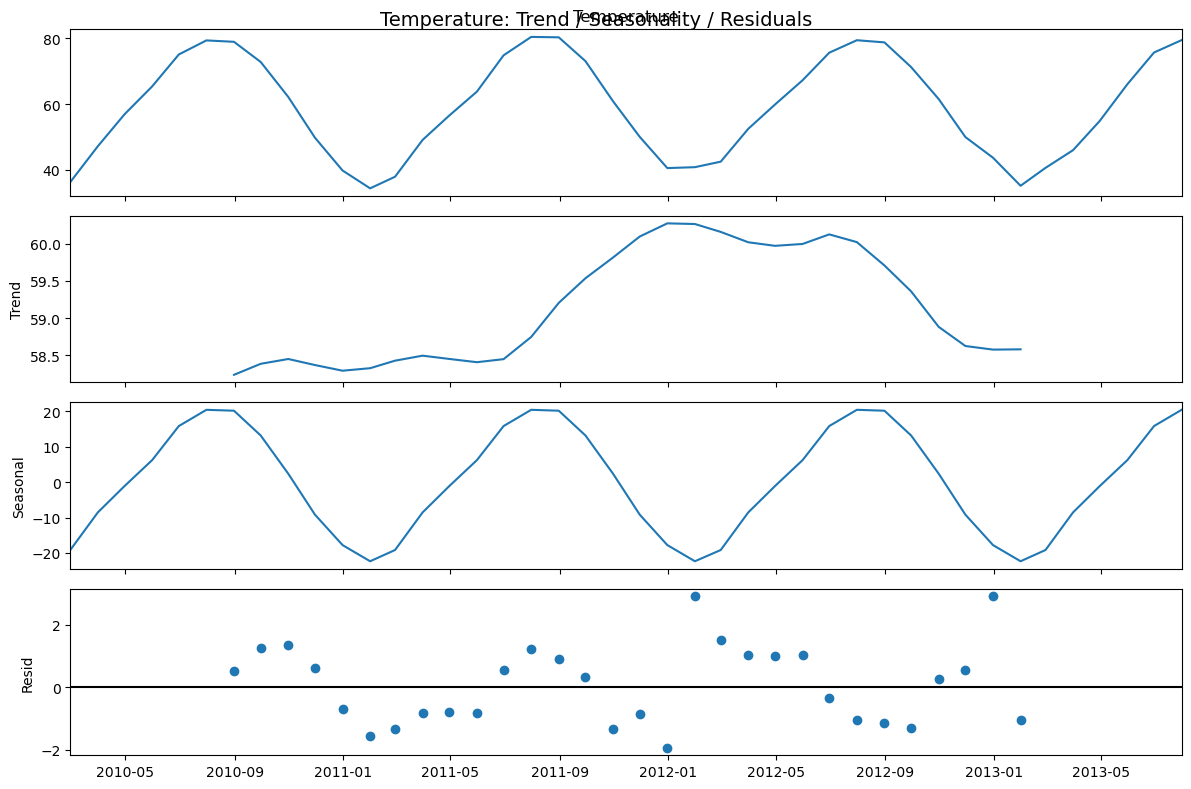

In [22]:
# I'll take the monthly temperature series from our numeric monthly frame and drop missing values
temp_monthly = wm_monthly["Temperature"].dropna().asfreq("M")

# I'll use seasonal_decompose with a 12-month period to separate trend/seasonality/residuals
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(temp_monthly, model="additive", period=12)

# Let's plot the decomposition pieces so we can visually inspect trend, seasonal, and residuals
plt.rcParams.update({"figure.figsize": (12,8)})
decomp.plot()
plt.suptitle("Temperature: Trend / Seasonality / Residuals", fontsize=14)
plt.show()


## Step 6: Feature Breakdown by Store

C:\Users\kk\AppData\Local\Temp\ipykernel_9296\596149933.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  md_by_store = walmart_df.groupby(["Store", pd.Grouper(key="Date", freq="M")])["TotalMarkDown"].sum()
C:\Users\kk\AppData\Local\Temp\ipykernel_9296\596149933.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  md_by_store = walmart_df.groupby(["Store", pd.Grouper(key="Date", freq="M")])["TotalMarkDown"].sum()


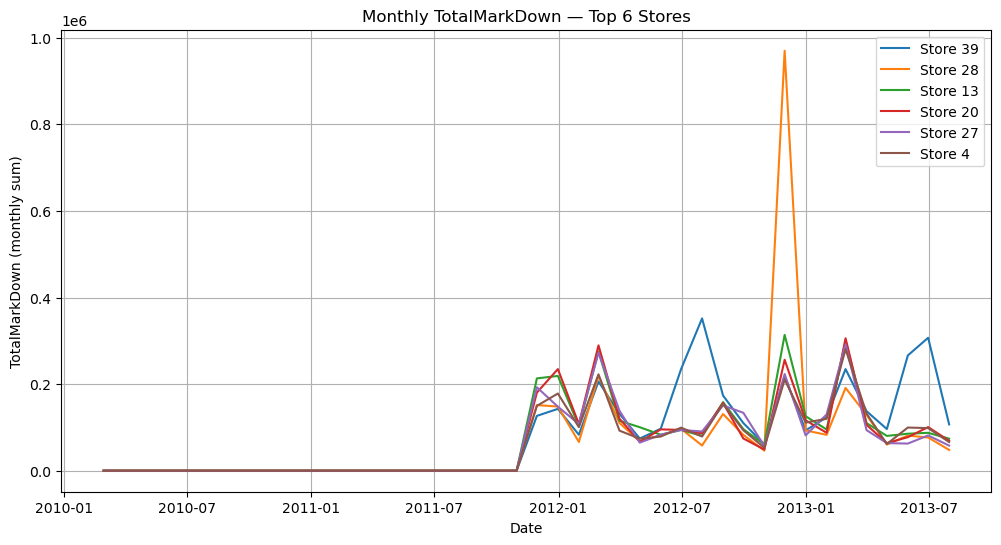

Average Temperature by Store (top 10):
Store
33    75.438077
42    71.329121
10    71.329121
11    71.217308
3     70.394176
36    70.232308
37    70.232308
39    69.695385
28    69.251703
12    69.251703
Name: Temperature, dtype: float64


C:\Users\kk\AppData\Local\Temp\ipykernel_9296\596149933.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_by_store = walmart_df.groupby("Store")["Temperature"].mean().sort_values(ascending=False)


In [23]:
# I'll compute monthly sums of TotalMarkDown per store using a safe groupby with pd.Grouper
md_by_store = walmart_df.groupby(["Store", pd.Grouper(key="Date", freq="M")])["TotalMarkDown"].sum()

# I'll reshape the result so each store becomes a column and missing months become 0
md_by_store = md_by_store.unstack(level=0).fillna(0)

# I'll find the top 6 stores by total markdown amount so plotting is readable
top_stores = md_by_store.sum().nlargest(6).index.tolist()

# Now I'll plot the monthly markdown sums for those top stores to inspect their patterns
plt.figure(figsize=(12,6))
for s in top_stores:
    plt.plot(md_by_store.index, md_by_store[s], label=f"Store {s}")
plt.title("Monthly TotalMarkDown — Top 6 Stores")
plt.xlabel("Date")
plt.ylabel("TotalMarkDown (monthly sum)")
plt.legend()
plt.grid(True)
plt.show()

# I'll also show the average temperature by store as a quick geographic-ish check
temp_by_store = walmart_df.groupby("Store")["Temperature"].mean().sort_values(ascending=False)
print("Average Temperature by Store (top 10):")
print(temp_by_store.head(10))


## Step 7: Simple Forecasting (Exponential Smoothing) — Fuel & Temperature examples

C:\Users\kk\AppData\Local\Temp\ipykernel_9296\2436160294.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fuel_monthly = wm_monthly["Fuel_Price"].dropna().asfreq("M")


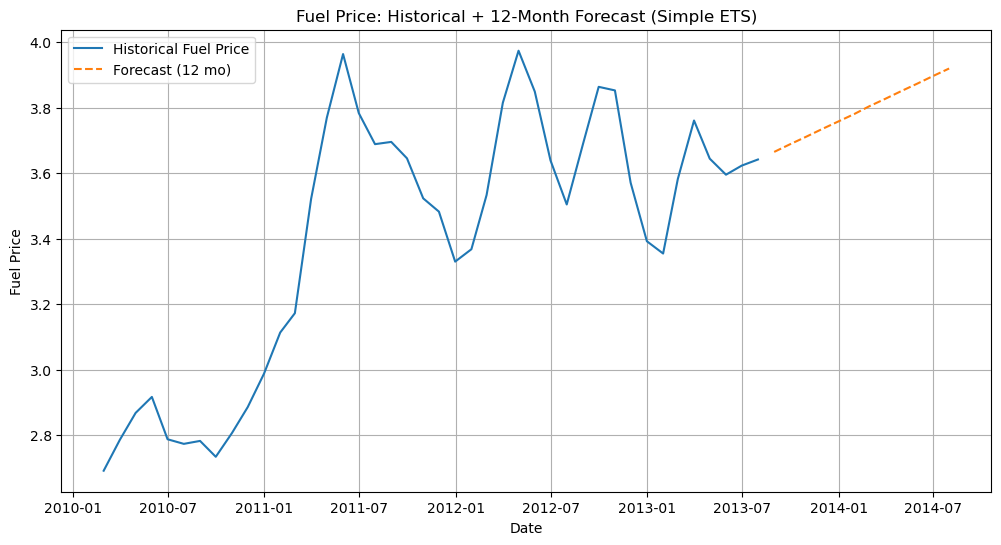

C:\Users\kk\AppData\Local\Temp\ipykernel_9296\2436160294.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp_monthly = wm_monthly["Temperature"].dropna().asfreq("M")


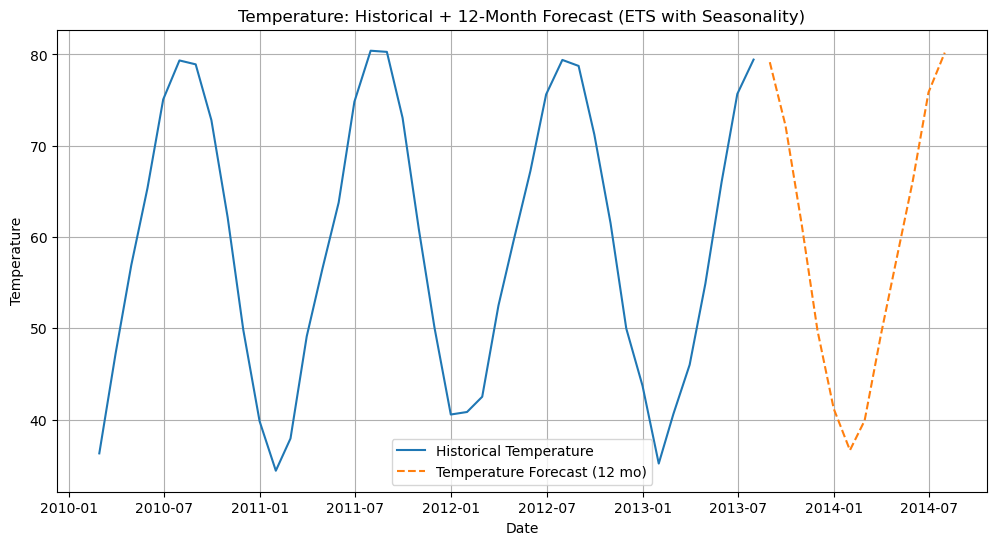

In [24]:
# I'll prepare the monthly fuel series (numeric, monthly, no NaNs)
fuel_monthly = wm_monthly["Fuel_Price"].dropna().asfreq("M")

# I'll fit a simple Exponential Smoothing model (additive trend, no seasonality for fuel)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_fuel = ExponentialSmoothing(fuel_monthly, trend="add", seasonal=None, initialization_method="estimated")
fit_fuel = model_fuel.fit()

# I'll forecast the next 12 months to produce a quick baseline forecast
fuel_forecast = fit_fuel.forecast(12)

# I'll plot the historical series alongside the forecast to visualize the continuation
plt.figure(figsize=(12,6))
plt.plot(fuel_monthly.index, fuel_monthly, label="Historical Fuel Price")
plt.plot(fuel_forecast.index, fuel_forecast, label="Forecast (12 mo)", linestyle="--")
plt.title("Fuel Price: Historical + 12-Month Forecast (Simple ETS)")
plt.xlabel("Date")
plt.ylabel("Fuel Price")
plt.legend()
plt.grid(True)
plt.show()

# For temperature (which is seasonal), I'll include seasonality in the ETS model
temp_monthly = wm_monthly["Temperature"].dropna().asfreq("M")
model_temp = ExponentialSmoothing(temp_monthly, trend="add", seasonal="add", seasonal_periods=12, initialization_method="estimated")
fit_temp = model_temp.fit()
temp_forecast = fit_temp.forecast(12)

# Plot temperature historical vs forecast to show seasonal continuation
plt.figure(figsize=(12,6))
plt.plot(temp_monthly.index, temp_monthly, label="Historical Temperature")
plt.plot(temp_forecast.index, temp_forecast, label="Temperature Forecast (12 mo)", linestyle="--")
plt.title("Temperature: Historical + 12-Month Forecast (ETS with Seasonality)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()


# CONCLUSION: 

##### In this project, we explored Walmart’s retail dataset through a time series lens, focusing on how external factors like Fuel Price, CPI, Unemployment, and Temperature evolve over time and potentially affect retail performance.

### 1. Data Preprocessing

##### • Cleaned missing values (especially in markdowns and economic indicators).

##### • Fixed data types for accuracy (dates, booleans, categories).

##### • Created useful time features (Year, Month, YearMonth).

##### • Built a TotalMarkDown metric to simplify discount analysis.

### 2. Trend Analysis

##### • Monthly averages revealed long-term trends:

##### • CPI showed a steady upward trajectory.

##### • Fuel Prices and Unemployment fluctuated over time.

##### • Temperature followed natural weather cycles.

### 3. Seasonality Patterns

#### Clear monthly patterns emerged:

##### • Temperature strongly seasonal (peaks in summer, dips in winter).

##### • Unemployment and Fuel Prices showed weaker seasonal signals.

### 4. Moving Averages

##### • Rolling means (3, 6, 12 months) smoothed short-term noise.

##### • Helped highlight underlying trends vs. random fluctuations.

### 5. Time Series Decomposition

##### • Breaking variables into Trend + Seasonality + Residuals made it easier to separate long-term growth from recurring cycles and random shocks.

### 6. Revenue/Markdown Breakdown

##### • By grouping per store, we identified top stores with highest markdown activities.

##### • Temperature patterns by store also hinted at geographical differences.

### 7. Forecasting (Bonus)

##### • Simple Exponential Smoothing models provided a baseline 12-month forecast.

##### • Temperature forecasts preserved seasonality, while fuel forecasts continued trend lines.